In [1]:
# Загрузка зависимостей
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

Using TensorFlow backend.


In [2]:
# Загрузка подготовленного набора данных
dataset = pd.read_csv('prepared_data.csv')
dataset.head(10)

,base_fond,science_fond,ams,n_buildings,n_days,guests,employees
0,0.871895,0.363097,0.000000,0.000000,0.714498,0.396161,0.465093
1,0.665213,0.531247,0.220794,0.309087,0.746423,1.675777,0.593582
2,0.819225,-0.054802,0.000000,0.000000,0.349273,0.735636,0.465093
3,-0.220496,-0.361025,0.129641,0.000000,0.972648,1.214102,0.370512
4,0.407500,0.645167,0.103005,0.077793,0.349273,-0.198597,0.258977
5,0.695033,0.526732,0.119234,0.000000,0.395516,-0.011512,0.176779
6,-1.312439,-1.505220,0.000000,0.000000,0.681944,1.859779,0.541836
7,-0.230401,-0.736972,0.112309,0.000000,0.395516,-0.984649,0.111535
8,0.200020,0.054739,0.064135,0.137486,0.725208,0.474124,0.482047
9,-0.787443,-0.501038,0.000000,0.000000,0.465671,-0.424837,0.176779


In [3]:
X = dataset.drop(columns=['guests']).values
Y = dataset['guests'].values

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [5]:
# Задаем параметры структуры нейронной сети.


input_layer_size = 6


first_hidden_layer_size = 6
second_hidden_layer_size = 6

output_layer_size = 1


epochs_number = 75
batch_size = 16

In [6]:
# Создание нейронной сети прямого распространения, пока она пустая, т.е. не содержит слоёв и нейронов.
model = Sequential()

# Входной слой и первый скрытый слой, функция активации - ReLU
model.add(Dense(first_hidden_layer_size, input_dim=input_layer_size, activation='relu'))

model.add(Dense(second_hidden_layer_size, activation='relu'))

model.add(Dense(output_layer_size, activation='linear'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Настройка нейронной сети.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

In [9]:
# Обучение нейронной сети.
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=epochs_number, batch_size=batch_size)

Train on 1819 samples, validate on 455 samples
Epoch 1/75
1819/1819 [==============================] - 1s 671us/step - loss: 0.8533 - mean_absolute_error: 0.7487 - mean_squared_error: 0.8533 - val_loss: 0.6258 - val_mean_absolute_error: 0.6339 - val_mean_squared_error: 0.6258
Epoch 2/75
1819/1819 [==============================] - 1s 392us/step - loss: 0.6230 - mean_absolute_error: 0.6330 - mean_squared_error: 0.6230 - val_loss: 0.4944 - val_mean_absolute_error: 0.5538 - val_mean_squared_error: 0.4944
Epoch 3/75
1819/1819 [==============================] - 1s 339us/step - loss: 0.4931 - mean_absolute_error: 0.5513 - mean_squared_error: 0.4931 - val_loss: 0.4242 - val_mean_absolute_error: 0.5032 - val_mean_squared_error: 0.4242
Epoch 4/75
1819/1819 [==============================] - 0s 226us/step - loss: 0.4418 - mean_absolute_error: 0.5148 - mean_squared_error: 0.4418 - val_loss: 0.3899 - val_mean_absolute_error: 0.4823 - val_mean_squared_error: 0.3899
Epoch 5/75
1819/1819 [===========

1819/1819 [==============================] - 0s 177us/step - loss: 0.2741 - mean_absolute_error: 0.4118 - mean_squared_error: 0.2741 - val_loss: 0.2826 - val_mean_absolute_error: 0.4159 - val_mean_squared_error: 0.2826
Epoch 37/75
1819/1819 [==============================] - 0s 219us/step - loss: 0.2739 - mean_absolute_error: 0.4124 - mean_squared_error: 0.2739 - val_loss: 0.2831 - val_mean_absolute_error: 0.4163 - val_mean_squared_error: 0.2831
Epoch 38/75
1819/1819 [==============================] - 0s 171us/step - loss: 0.2731 - mean_absolute_error: 0.4118 - mean_squared_error: 0.2731 - val_loss: 0.2861 - val_mean_absolute_error: 0.4134 - val_mean_squared_error: 0.2861
Epoch 39/75
1819/1819 [==============================] - 0s 205us/step - loss: 0.2718 - mean_absolute_error: 0.4108 - mean_squared_error: 0.2718 - val_loss: 0.2862 - val_mean_absolute_error: 0.4135 - val_mean_squared_error: 0.2862
Epoch 40/75
1819/1819 [==============================] - 0s 244us/step - loss: 0.2720 - 

1819/1819 [==============================] - 0s 154us/step - loss: 0.2679 - mean_absolute_error: 0.4081 - mean_squared_error: 0.2679 - val_loss: 0.2803 - val_mean_absolute_error: 0.4112 - val_mean_squared_error: 0.2803
Epoch 72/75
1819/1819 [==============================] - 0s 150us/step - loss: 0.2665 - mean_absolute_error: 0.4074 - mean_squared_error: 0.2665 - val_loss: 0.2816 - val_mean_absolute_error: 0.4110 - val_mean_squared_error: 0.2816
Epoch 73/75
1819/1819 [==============================] - 0s 165us/step - loss: 0.2670 - mean_absolute_error: 0.4084 - mean_squared_error: 0.2670 - val_loss: 0.2838 - val_mean_absolute_error: 0.4105 - val_mean_squared_error: 0.2838
Epoch 74/75
1819/1819 [==============================] - 0s 159us/step - loss: 0.2679 - mean_absolute_error: 0.4086 - mean_squared_error: 0.2679 - val_loss: 0.2804 - val_mean_absolute_error: 0.4125 - val_mean_squared_error: 0.2804
Epoch 75/75
1819/1819 [==============================] - 0s 152us/step - loss: 0.2664 - 

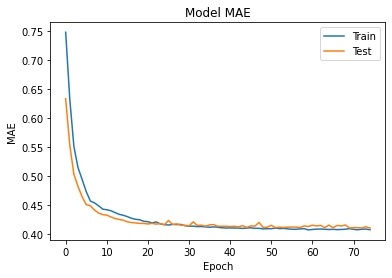

In [10]:
# Выводим динамику среднего абсолютного отклонения от номера эпохи обучения.
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error']) 
plt.title('Model MAE') 
plt.ylabel('MAE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

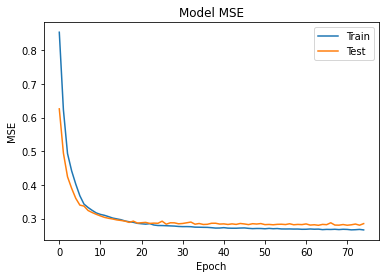

In [11]:
# Выводим динамику среднеквадратического отклонения, т.е. значения функции потерь, от номера эпохи обучения.
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']) 
plt.title('Model MSE') 
plt.ylabel('MSE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

In [12]:
# Предсказание уже обученной нейронной сети на обучающей выборке:
Y_pred_train = model.predict(X_train).flatten()

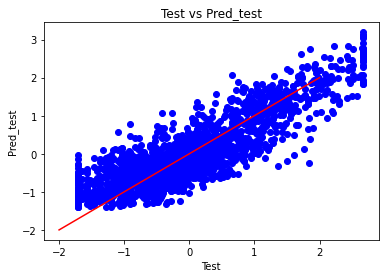

In [13]:
# Сравним эталонные значения Y_train и результат работы обученной нейронной сети Y_pred_train для обучающей выборки.
plt.plot(Y_train, Y_pred_train, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

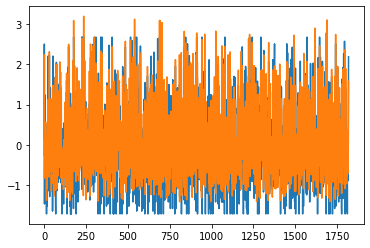

In [14]:
# Выведем сами значения Y_train и Y_pred_train.
plt.plot(Y_train)
plt.plot(Y_pred_train)
plt.show()

In [15]:
# Предсказание обученной нейронной сети на тестовой выборке:
Y_pred_test = model.predict(X_test).flatten()

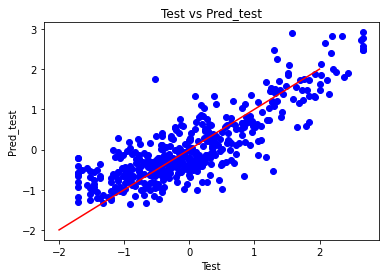

In [16]:
# Сравним эталонные значения Y_test и результат работы обученной нейронной сети Y_pred_test для тестовой выборки.
plt.plot(Y_test, Y_pred_test, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

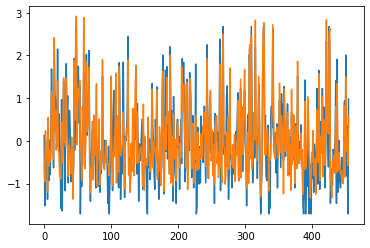

In [17]:
# Выведем сами значения Y_test и Y_pred_test.
plt.plot(Y_test)
plt.plot(Y_pred_test)
plt.show()

In [18]:
# Сравним среднеквадратичные ошибки (значения функции потерь) для обучающей и тестовой выборок.
print(np.sqrt(mean_squared_error(Y_train, Y_pred_train)))
print(np.sqrt(mean_squared_error(Y_test, Y_pred_test)))

0.5156180155283597
0.5339313727840336


In [19]:
# Проверим на нормальное распределение разности пар (Y_train, Y_pred_train), (Y_test, Y_pred_test)
k_train, p_train = stats.shapiro(Y_train - Y_pred_train)
print('Train k = {0}, p = {1}'.format(k_train, p_train))

k_test, p_test = stats.shapiro(Y_test - Y_pred_test)
print('Test k = {0}, p = {1}'.format(k_test, p_test))

Train k = 0.9984310865402222, p = 0.08766280859708786
Test k = 0.9909635186195374, p = 0.006984648760408163


In [20]:
# Для полной выборки (Y, Y_pred) применим два статистических теста: shapiro и normaltest.
Y_pred = model.predict(X).flatten()

k_s, p_s = stats.shapiro(Y - Y_pred)
print('k_s = {0}, p_s = {1}'.format(k_s, p_s))

k_n, p_n = stats.normaltest(Y - Y_pred)
print('k_n = {0}, p_n = {1}'.format(k_n, p_n))

k_s = 0.9979947805404663, p_s = 0.005998074542731047
k_n = 10.147613794989645, p_n = 0.0062585490774804695


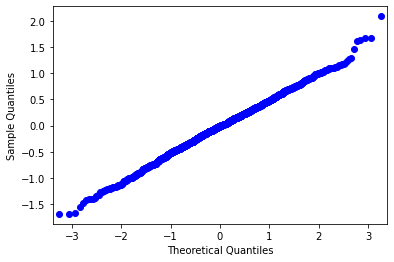

In [21]:
# И тоже самое визуально, с помощью грфиков квантиль-квантиль.
# Обучающая выборка
qqplot(Y_train - Y_pred_train)
plt.show()

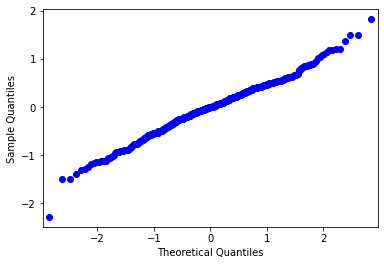

In [22]:
# Тестовая выборка
qqplot(Y_test - Y_pred_test)
plt.show()

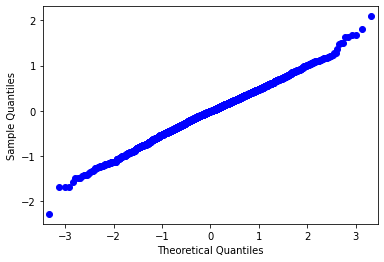

In [23]:
# Полная выборка
qqplot(Y - Y_pred)
plt.show()

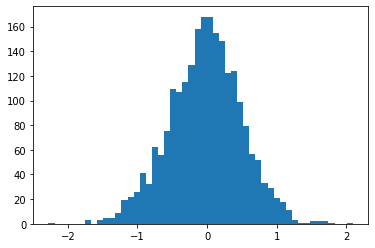

In [24]:
plt.hist(Y - Y_pred, bins=50)
plt.show()

In [25]:
model.save('SimpleNeuralNetwork.h5')